In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.5 MB/s eta 0:00:00


In [4]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,794 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [6]:
!pip install pytesseract


In [7]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import os
import datetime
import pandas as pd
import re
import pdfplumber
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pytesseract import image_to_string
from google.colab import files
from google.colab import drive
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [8]:
#Подключение к папке
# Аутентификация
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Получение ID папки
folder_id = '1yA5HP32L-ZIMQctuPcU_cMaA3Xnaqek_'

In [9]:
# Функция для получения списка файлов в папке
def list_files_in_folder(folder_id):
    query = f"'{folder_id}' in parents"
    # Указываем необходимые поля для получения информации о файлах
    results = drive_service.files().list(q=query, fields="files(id, name, createdTime)").execute()
    files = results.get('files', [])
    return files

# Получение списка файлов
files = list_files_in_folder(folder_id)
for file in files:
    print(f"File Name: {file['name']}, File ID: {file['id']}, Created Time: {file['createdTime']}")


File Name: 42094798177576.pdf, File ID: 11-W066ntYqjijmMJPcrutH5nR2lEVIjY, Created Time: 2024-08-12T10:06:04.327Z
File Name: 40097998786823.pdf, File ID: 1BXcG23qNf7rFXYMq4NqXqCGjAws4Wse9, Created Time: 2024-08-12T10:05:59.568Z
File Name: 44394498339518.pdf, File ID: 1qQIxXUTrRp5gMXO-8eItWG5RfvdlrTqg, Created Time: 2024-08-12T10:06:09.433Z
File Name: 45081398959098.pdf, File ID: 19Jd-Qg6GQRzcrxcwSq0wvmRuZtc5EM8s, Created Time: 2024-08-12T10:06:12.747Z
File Name: 42094798212604.pdf, File ID: 1nOozXf1luYk9F7b1I8mBj_CNQiR-m5Gz, Created Time: 2024-08-12T10:06:03.082Z
File Name: 63097598827378.pdf, File ID: 1he2kyzr28iN1UIF_TV_DTleCv-fV_pyo, Created Time: 2024-08-12T10:05:46.289Z
File Name: 62095098682641.pdf, File ID: 1uJUN1pWuiI3rjAt57KapUTlSvLIpekSc, Created Time: 2024-08-12T10:05:42.375Z
File Name: 67990198196911.pdf, File ID: 1RF3o84ogNUHGEDUdUziwipeKm3VQBd74, Created Time: 2024-08-12T10:05:52.648Z
File Name: 63097598807301.pdf, File ID: 1rM7_xn883j7L67KZTtv5rR3I1kLnrYhd, Created Time:

In [10]:
import datetime

# Функция для фильтрации файлов за весь июль-август 2024 года
def filter_files_for_august(files):
    filtered_files = []
    # Устанавливаем начальную и конечную даты
    start_date = datetime.date(2024, 7, 15)  # Начало
    end_date = datetime.date(2024, 8, 31)    # Конец

    for file in files:
        created_time = file['createdTime'][:10]  # Получаем только дату
        created_date = datetime.datetime.strptime(created_time, '%Y-%m-%d').date()
        # Проверяем, попадает ли дата создания файла в диапазон
        if start_date <= created_date <= end_date:
            filtered_files.append(file)
    return filtered_files

# Применение фильтрации
filtered_files = filter_files_for_august(files)

# Проверка результата
print("Filtered Files for August 2024:")
for file in filtered_files:
    print(f"File Name: {file['name']}, File ID: {file['id']}, Created Time: {file['createdTime']}")



Filtered Files for August 2024:
File Name: 42094798177576.pdf, File ID: 11-W066ntYqjijmMJPcrutH5nR2lEVIjY, Created Time: 2024-08-12T10:06:04.327Z
File Name: 40097998786823.pdf, File ID: 1BXcG23qNf7rFXYMq4NqXqCGjAws4Wse9, Created Time: 2024-08-12T10:05:59.568Z
File Name: 44394498339518.pdf, File ID: 1qQIxXUTrRp5gMXO-8eItWG5RfvdlrTqg, Created Time: 2024-08-12T10:06:09.433Z
File Name: 45081398959098.pdf, File ID: 19Jd-Qg6GQRzcrxcwSq0wvmRuZtc5EM8s, Created Time: 2024-08-12T10:06:12.747Z
File Name: 42094798212604.pdf, File ID: 1nOozXf1luYk9F7b1I8mBj_CNQiR-m5Gz, Created Time: 2024-08-12T10:06:03.082Z
File Name: 63097598827378.pdf, File ID: 1he2kyzr28iN1UIF_TV_DTleCv-fV_pyo, Created Time: 2024-08-12T10:05:46.289Z
File Name: 62095098682641.pdf, File ID: 1uJUN1pWuiI3rjAt57KapUTlSvLIpekSc, Created Time: 2024-08-12T10:05:42.375Z
File Name: 67990198196911.pdf, File ID: 1RF3o84ogNUHGEDUdUziwipeKm3VQBd74, Created Time: 2024-08-12T10:05:52.648Z
File Name: 63097598807301.pdf, File ID: 1rM7_xn883j7L67K

In [11]:
#Скачиваем поочередно все pdf-файлы

def download_file(file_id, file_name):
    request = drive_service.files().get_media(fileId=file_id)
    with open(file_name, 'wb') as f:
        downloader = MediaIoBaseDownload(f, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            print(f"Downloading {file_name}: {int(status.progress() * 100)}%.")

# Скачивание отфильтрованных файлов
for file in filtered_files:
    download_file(file['id'], file['name'])


In [12]:
# Извлечение изображений с указанной страницы
def extract_images_from_pdf(file_path, page_number=None):
    images = []
    with pdfplumber.open(file_path) as pdf:
        if page_number is None:
            # Извлекаем изображения со всех страниц
            for page in pdf.pages:
                for img in page.images:
                    img_obj = page.within_bbox((img['x0'], img['top'], img['x1'], img['bottom'])).to_image()
                    images.append(img_obj.original)
        else:
            # Извлекаем изображения с указанной страницы
            if page_number < len(pdf.pages):
                page = pdf.pages[page_number]
                for img in page.images:
                    img_obj = page.within_bbox((img['x0'], img['top'], img['x1'], img['bottom'])).to_image()
                    images.append(img_obj.original)
    return images

# Извлечение информации из PDF
def extract_info_from_pdf(file_path):
    with pdfplumber.open(file_path) as pdf:
        first_page = pdf.pages[0]
        text = first_page.extract_text()
        cleaned_text = re.sub(r'\s+', ' ', text).strip()
        file_number = file_path.split('/')[-1]

        violation_number_match = re.search(r'ПОСТАНОВЛЕНИЕ (\d+)', cleaned_text)
        violation_number = violation_number_match.group(1) if violation_number_match else None

        violation_datetime = re.search(r'(\d{2}\.\d{2}\.\d{4}) в (\d{2}:\d{2}:\d{2})', cleaned_text)
        violation_date, violation_time = (violation_datetime.groups() if violation_datetime else (None, None))

        address_match = re.search(r'по адресу\s*([\s\S]+?)(?=\s*[;]|$)', cleaned_text, re.IGNORECASE)
        address = address_match.group(1) if address_match else None

        vehicle_number_match = re.search(r'государственный регистрационный знак (\w+)', cleaned_text)
        vehicle_number = vehicle_number_match.group(1) if vehicle_number_match else None

        fine_amount_match = re.search(r'в размере ([\d\s]+) руб', cleaned_text)
        fine_amount = fine_amount_match.group(1).replace(' ', '') if fine_amount_match else None

        sts_number_match = re.search(r'свидетельством о регистрации ТС №(\d+)', cleaned_text)
        sts_number = sts_number_match.group(1) if sts_number_match else None

        # Извлечение изображений
        images = extract_images_from_pdf(file_path, page_number=1)  # Извлекаем изображения со страницы 2
        vehicle_photo_path = "vehicle_photo.png"
        license_plate_photo_path = "license_plate_photo.png"

        vehicle_photo = None
        license_plate_photo = None

        if images:
            license_plate_photo = images[0]  # Номерной знак
            if len(images) > 1:
                vehicle_photo = images[1]  # Машина

        # Сохранение изображений на диск
        if license_plate_photo:
            license_plate_photo.save(license_plate_photo_path)
        if vehicle_photo:
            vehicle_photo.save(vehicle_photo_path)

        license_plate = vehicle_number

        return {
            'file_number': file_number,
            'violation_number': violation_number,
            'violation_date': violation_date,
            'violation_time': violation_time,
            'address': address,
            'vehicle_number': vehicle_number,
            'fine_amount': fine_amount,
            'sts_number': sts_number,
            'vehicle_photo': vehicle_photo,
            'license_plate_photo': license_plate_photo,
            'license_plate': license_plate
        }


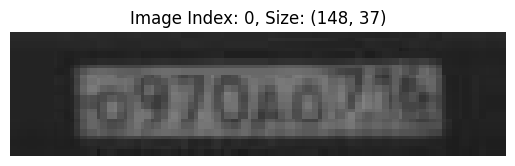

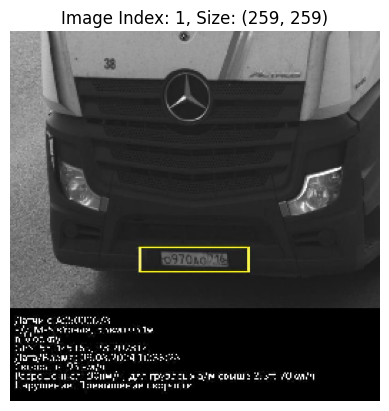

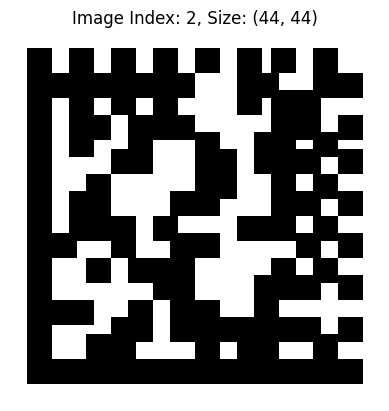

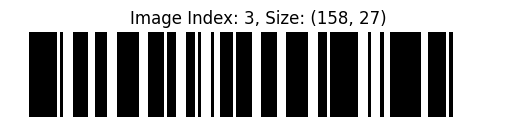

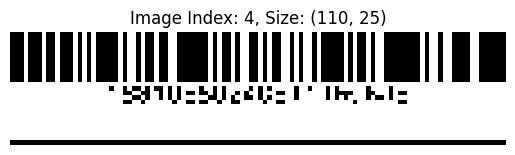

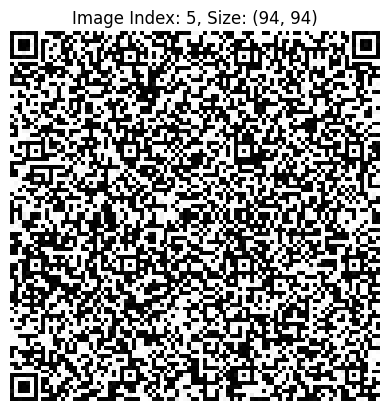

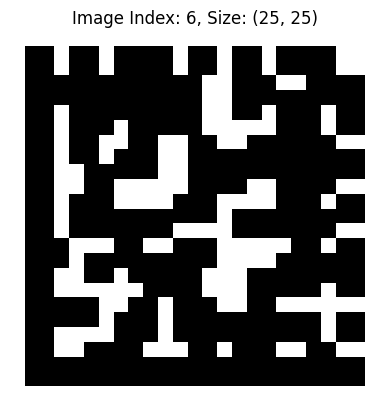

In [13]:
# Из pdf-файла извлекаем изображения с указанной страницы
def extract_images_from_pdf(file_path, page_number):
    images = []
    with pdfplumber.open(file_path) as pdf:
        if page_number < len(pdf.pages):  # Проверяем, существует ли страница
            page = pdf.pages[page_number]
            for img in page.images:
                # Извлекаем изображение в формате PIL
                img_obj = page.within_bbox((img['x0'], img['top'], img['x1'], img['bottom'])).to_image()
                images.append(img_obj.original)  # Сохраняем изображение как объект PIL
    return images

# Пример использования
file_path = '14588498880708.pdf'
page_number = 1  # Задайте номер страницы, с которой хотите извлечь изображения (индекс 1 соответствует второй странице)
images = extract_images_from_pdf(file_path, page_number)

# Визуализация изображений
for img_index, img in enumerate(images):
    plt.imshow(img)
    plt.title(f"Image Index: {img_index}, Size: {img.size}")
    plt.axis('off')  # Отключаем оси
    plt.show()



In [14]:
from google.colab import files

# Функция для загрузки файла
uploaded = files.upload()


for filename in uploaded.keys():
    pdf_file_path = filename

info = extract_info_from_pdf(pdf_file_path)

print("Содержимое текущего каталога:")
!ls
# Создание таблицы с данными
if info:
    df = pd.DataFrame([info])
    df.to_csv('extracted_fines_info.csv', mode='a', header=False, index=False)


Saving 42094798177576.pdf to 42094798177576 (1).pdf
Содержимое текущего каталога:
 14573698089594.pdf	   42094798227257.pdf   45081498125393.pdf   64497298678949.pdf
 14588298307467.pdf	   42094798294341.pdf   61094298144875.pdf   64497298698787.pdf
 14588498697238.pdf	   42094798304040.pdf   61491098658302.pdf   64497298718775.pdf
 14588498737163.pdf	   42094798304057.pdf   62095098592452.pdf   64497298726756.pdf
 14588498880708.pdf	   42094798333750.pdf   62095098672536.pdf   66604798258672.pdf
 14588498890844.pdf	   42094798357923.pdf   62095098682641.pdf   66604798269081.pdf
 14588498960950.pdf	   44394498339518.pdf   63097598617382.pdf   67990198196911.pdf
 40097998786823.pdf	   45081198479499.pdf   63097598717419.pdf   68092198406904.pdf
 40097998837150.pdf	   45081198559610.pdf   63097598807301.pdf   license_plate_photo.png
 40097998856885.pdf	   45081398949327.pdf   63097598827378.pdf   sample_data
'42094798177576 (1).pdf'   45081398959098.pdf   64497298101782.pdf   vehicle_pho

In [15]:
from google.colab import drive
drive.mount('/content/drive')

!cp 'extracted_fines_info.csv' '/content/drive/My Drive/'


Mounted at /content/drive


In [17]:
# Функция для извлечения текста с изображения
def extract_text_from_image(image):
    # Преобразование изображения в формат, подходящий для OCR
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    text = image_to_string(binary, config='--psm 8')
    return text.strip()

# Функция для проверки соответствия госномера
def check_license_plate(license_plate_text, license_plate_image):
    extracted_plate = extract_text_from_image(license_plate_image)
    return extracted_plate == license_plate_text

In [18]:
# Функция для создания таблицы штрафов
def create_fines_table(files):
    fines_data = []

    for file in files:
        file_path = file['name']  # Имя файла
        print(f"Обработка файла: {file_path}")
        info = extract_info_from_pdf(file_path)

        # Проверка, что информация была извлечена
        if not info:
            print(f"Не удалось извлечь информацию из файла: {file_path}")
            continue

        # Проверка соответствия госномера
        license_plate_match = check_license_plate(info['vehicle_number'], info.get('license_plate_photo', None))

        # Проверка суммы штрафа
        fine_amount = int(info['fine_amount']) if info['fine_amount'] else 0
        fine_over_5000 = fine_amount > 5000

        # Добавление данных в таблицу
        fines_data.append({
            'Номер файла': info['file_number'],
            'Постановление': info['violation_number'],
            'Дата': info['violation_date'],
            'Время': info['violation_time'],
            'Адрес': info['address'],
            'Гос номер': info['vehicle_number'],
            'Сумма штрафа': fine_amount,
            'Сумма штрафа > 5000': fine_over_5000,
            'Номер СТС': info.get('sts_number', None),
            'Фото ТС': info.get('vehicle_photo', None),
            'Фото гос номера': info.get('license_plate_photo', None),
            'Фото гос номера соответствует': license_plate_match
        })

    # Создание DataFrame
    fines_df = pd.DataFrame(fines_data)
    return fines_df

# Использование
fines_table = create_fines_table(filtered_files)

# Вывод таблицы
fines_table.head()


Обработка файла: 42094798177576.pdf
Обработка файла: 40097998786823.pdf
Обработка файла: 44394498339518.pdf
Обработка файла: 45081398959098.pdf
Обработка файла: 42094798212604.pdf
Обработка файла: 63097598827378.pdf
Обработка файла: 62095098682641.pdf
Обработка файла: 67990198196911.pdf
Обработка файла: 63097598807301.pdf
Обработка файла: 62095098672536.pdf
Обработка файла: 63097598717419.pdf
Обработка файла: 42094798357923.pdf
Обработка файла: 42094798333750.pdf
Обработка файла: 62095098592452.pdf
Обработка файла: 42094798304057.pdf
Обработка файла: 42094798304040.pdf
Обработка файла: 42094798294341.pdf
Обработка файла: 63097598617382.pdf
Обработка файла: 68092198406904.pdf
Обработка файла: 14588498880708.pdf
Обработка файла: 14588498890844.pdf
Обработка файла: 14588498960950.pdf
Обработка файла: 14588498737163.pdf
Обработка файла: 14588498697238.pdf
Обработка файла: 45081398949327.pdf
Обработка файла: 61094298144875.pdf
Обработка файла: 42094798224119.pdf
Обработка файла: 42094798227

,Номер файла,Постановление,Дата,Время,Адрес,Гос номер,Сумма штрафа,Сумма штрафа > 5000,Номер СТС,Фото ТС,Фото гос номера,Фото гос номера соответствует
0,42094798177576.pdf,18810516240809360684,08.08.2024,11:48:08,"а/д М-7 ""Волга"", 755 км., в направлении г.Моск...",Н791УХ716,500,False,9938002516,<PIL.Image.Image image mode=RGB size=243x259 a...,<PIL.Image.Image image mode=RGB size=144x37 at...,False
1,40097998786823.pdf,18810534240809081694,08.08.2024,15:08:19,"Волгоградская обл., Городищенский р-н, ФАД А-2...",М293ХМ716,500,False,9962216195,<PIL.Image.Image image mode=RGB size=280x259 a...,<PIL.Image.Image image mode=RGB size=143x37 at...,False
2,44394498339518.pdf,18810563240809004179,24.07.2024,10:35:57,"а/д М-5 ""Урал"", км 1052 + 760, Самарская обл. ...",Н848УХ716,500,False,9938002508,<PIL.Image.Image image mode=RGB size=306x259 a...,<PIL.Image.Image image mode=RGB size=137x37 at...,False
3,45081398959098.pdf,18810502240809441956,27.07.2024,18:28:18,"а/д M5 Mосква-Уфа-Челябинск, 1401кM + 495M, Ба...",С834УА716,500,False,9966395134,<PIL.Image.Image image mode=RGB size=242x259 a...,<PIL.Image.Image image mode=RGB size=46x37 at ...,False
4,42094798212604.pdf,18810516240809389232,08.08.2024,07:52:00,"а/д М7 ""Волга"", 857 км. в направлении г. Уфа, ...",О500ТК716,500,False,9949055586,<PIL.Image.Image image mode=RGB size=255x259 a...,<PIL.Image.Image image mode=RGB size=148x35 at...,False


In [21]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(subject, body, to_email):
    smtp_server = 'smtp.yandex.ru'
    smtp_port = 587
    smtp_user = 'bekentaeva@yandex.ru'
    smtp_password = '8qmfqmhbmtxyhnlrr'

    msg = MIMEMultipart()
    msg['From'] = smtp_user
    msg['To'] = to_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    try:
        with smtplib.SMTP(smtp_server, smtp_port) as server:
            server.starttls()  # Начало TLS
            server.login(smtp_user, smtp_password)  # Аутентификация
            server.send_message(msg)  # Отправка сообщения
            print("Email sent successfully.")
    except smtplib.SMTPAuthenticationError:
        print("Authentication failed. Check your username and password.")
    except smtplib.SMTPException as e:
        print(f"Error occurred: {e}")

In [22]:
# Функция для создания таблицы штрафов
def create_fines_table(files):
    fines_data = []

    for file in files:
        file_path = file['name']  # Имя файла
        print(f"Обработка файла: {file_path}")  # Отладочное сообщение
        info = extract_info_from_pdf(file_path)

        # Проверка, что информация была извлечена
        if not info:
            print(f"Не удалось извлечь информацию из файла: {file_path}")
            continue  # Пропустить файл, если информация не извлечена

        # Проверка соответствия госномера
        license_plate_match = check_license_plate(info['vehicle_number'], info.get('license_plate_photo', None))

        # Проверка суммы штрафа
        fine_amount = int(info['fine_amount']) if info['fine_amount'] else 0
        fine_over_5000 = fine_amount > 5000

        # Добавление данных в таблицу
        fines_data.append({
            'Номер файла': info['file_number'],
            'Постановление': info['violation_number'],
            'Дата': info['violation_date'],
            'Время': info['violation_time'],
            'Адрес': info['address'],
            'Гос номер': info['vehicle_number'],
            'Сумма штрафа': fine_amount,
            'Сумма штрафа > 5000': fine_over_5000,
            'Номер СТС': info.get('sts_number', None),
            'Фото ТС': info.get('vehicle_photo', None),
            'Фото гос номера': info.get('license_plate_photo', None),
            'Фото гос номера соответствует': license_plate_match
        })

    # Создание DataFrame
    fines_df = pd.DataFrame(fines_data)
    return fines_df

# Функция для извлечения уникальных адресов и их количества
def extract_unique_addresses(fines_df):
    address_counts = fines_df['Адрес'].value_counts().reset_index()
    address_counts.columns = ['Адрес', 'Количество']
    return address_counts

# Использование
fines_table = create_fines_table(filtered_files)

# Извлечение уникальных адресов с их количеством
unique_address_table = extract_unique_addresses(fines_table)

# Вывод таблицы адресов
unique_address_table.head(49)

# Отправка таблицы по электронной почте
send_email("Отчет по адресам", unique_address_table.to_string(index=False), "o2rus.tech@gmail.com")


Обработка файла: 42094798177576.pdf
Обработка файла: 40097998786823.pdf
Обработка файла: 44394498339518.pdf
Обработка файла: 45081398959098.pdf
Обработка файла: 42094798212604.pdf
Обработка файла: 63097598827378.pdf
Обработка файла: 62095098682641.pdf
Обработка файла: 67990198196911.pdf
Обработка файла: 63097598807301.pdf
Обработка файла: 62095098672536.pdf
Обработка файла: 63097598717419.pdf
Обработка файла: 42094798357923.pdf
Обработка файла: 42094798333750.pdf
Обработка файла: 62095098592452.pdf
Обработка файла: 42094798304057.pdf
Обработка файла: 42094798304040.pdf
Обработка файла: 42094798294341.pdf
Обработка файла: 63097598617382.pdf
Обработка файла: 68092198406904.pdf
Обработка файла: 14588498880708.pdf
Обработка файла: 14588498890844.pdf
Обработка файла: 14588498960950.pdf
Обработка файла: 14588498737163.pdf
Обработка файла: 14588498697238.pdf
Обработка файла: 45081398949327.pdf
Обработка файла: 61094298144875.pdf
Обработка файла: 42094798224119.pdf
Обработка файла: 42094798227

,Адрес,Количество
0,"а/д М-7 ""Волга"", 755 км., в направлении г.Моск...",1
1,"Кировская обл.,Слободской р-н,ФАД«Кострома-Шар...",1
2,"а/д М7 ""Волга"", 948 км. в направлении г. Уфа, ...",1
3,"а/д А-260 ""Волгоград - Каменск-Шахтинский - гр...",1
4,"а/д Р-228 ""Сызрань - Саратов - Волгоград"", км ...",1
5,"А/д Уфа- Инзер- Белорецк 11 км + 450 метров, Б...",1
6,"ФАД Р-254 ""Иртыш"" Челябинск-Курган-Омск-Новоси...",1
7,"ФАД Р-254 ""Иртыш"" Челябинск-Курган-Омск-Новоси...",1
8,"ФАД Р-402 Тюмень-Ялуторовск-Ишим-Омск, км 386+...",1
9,"а/д M5 Mосква-Уфа-Челябинск, 1343 КM + 275 М ,...",1
